Notebook showcasing the different examples mentionned in the manuscript "On proportional volume sampling for
experimental design in general spaces". Please make sure the working directory is where the "ODfunctions.py" file is and all the required librairies are installed.

In [1]:
import os as os
os.chdir("/home/arnaud/Desktop/Testpython") #Working directory where the "ODfunctions.py" file is.
from ODfunctions import OptDesign, DOGS, LSA, ExM, Discrete_ExM, PHImono #Requires the packages: math, numpy,
#cvxopt, matplotlib, scipy and dppy.
from scipy.interpolate import BSpline
import numpy as np
import matplotlib.pyplot as plt
import time as time

# 1. Three-component mixture design with quadratic constraints

This example is taken from Example 16.3 in the book "Optimum Experimental Designs, with SAS" by Atkinson, Donev and Tobias.

log D-optimality criterion for this random design chosen with a uniform distribution: 19.356271288594474


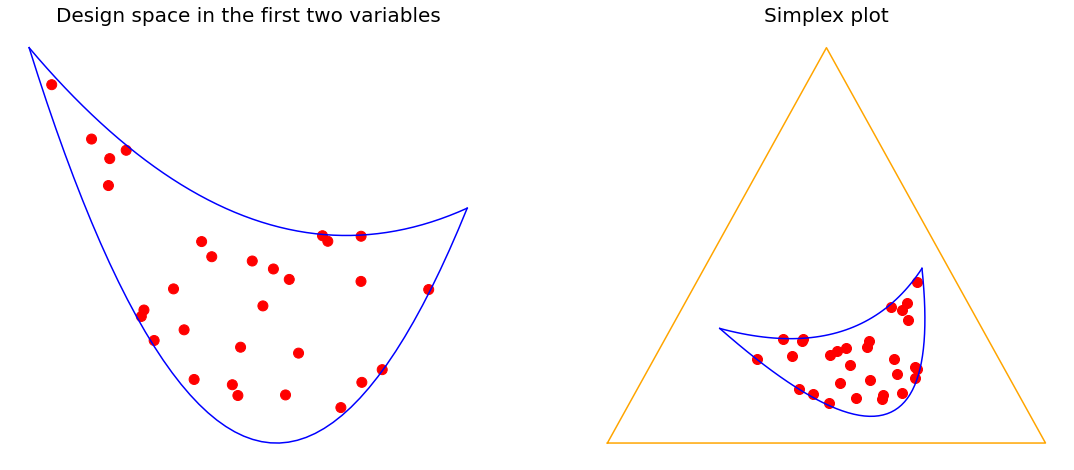

In [2]:
PHI = PHImono(2, 2)

def SimplexCara(P): #Characteristic function of the design space.
    Bool_Ar = np.logical_and(-1.174*P[:, 0]**2+1.057*P[:, 0]+P[:, 1] <= 0.5019,\
                             -4.062*P[:, 0]**2+2.962*P[:, 0]+P[:, 1] >= 0.6075)
    return(Bool_Ar)

def Simplexplot(ax): #Plot function of the design space.
    a = 2.888
    b = -1.905
    c = 0.1056
    Delta = b**2-4*a*c
    x0 = (-b-np.sqrt(Delta))/(2*a)
    x1 = (-b+np.sqrt(Delta))/(2*a)
    t = np.linspace(x0, x1, 50)
    ax.plot(t, 1.174*t**2-1.057*t+0.5019, 'b')
    ax.plot(t, 4.062*t**2-2.962*t+0.6075, 'b')
    ax.axis("off")
    return ax

OD_3mix = OptDesign(PHI, [0,0], [1,1], nbpoint=30, cara=SimplexCara, plot_fun=Simplexplot) #We consider the design
#space of the first two components of the mixture designs

P = OD_3mix.Urand(OD_3mix.nbpoint)
print("log D-optimality criterion for this random design chosen with a uniform distribution:", end=" ")
print(OD_3mix.opt(P, crit="D"))

#We also show the simplex plot corresponding to the design as it was done in Atkinson's book.
fig = OD_3mix.plot(P, modify_plot=True)
fig.axes[0].change_geometry(1, 2, 1)
fig.axes[0].set_title("Design space in the first two variables", fontsize=20)
fig.add_subplot(1, 2, 2)
fig.set_size_inches(19, 8)

a = 4.062-1.174
b = -2.962+1.057
c = 0.6075-0.5019
Delta = b**2-4*a*c
x0 = (-b-np.sqrt(Delta))/(2*a)
x1 = (-b+np.sqrt(Delta))/(2*a)

T1 = np.linspace(x0, x1, 50)
A = 1.174*T1**2-1.057*T1+0.5019
T1 = 1-T1-A/2
A *= np.sqrt(5)/2

T2 = np.linspace(x0,x1,50)
B = 4.062*T2**2-2.962*T2+0.6075
T2 = 1-T2-B/2
B *= np.sqrt(5)/2

Q = np.copy(P)
Q[:,0] = 1-P[:,0]-P[:,1]/2
Q[:,1] *= np.sqrt(5)/2

fig.axes[1].plot(T1, A, 'b')
fig.axes[1].plot(T2, B, 'b')
fig.axes[1].plot([0, 0.5, 1, 0], [0, np.sqrt(5)/2, 0, 0], 'orange')
fig.axes[1].axis("off")
fig.axes[1].scatter(Q[:, 0],Q[:, 1], marker='o',c='r',s=100)
fig.axes[1].set_title("Simplex plot", fontsize=20)
fig

The authors found the following optimal design. This is the one shown by Figure 16.4 in Atkinson's book.

Optimal log D-optimality criterion: 13.89328530093601


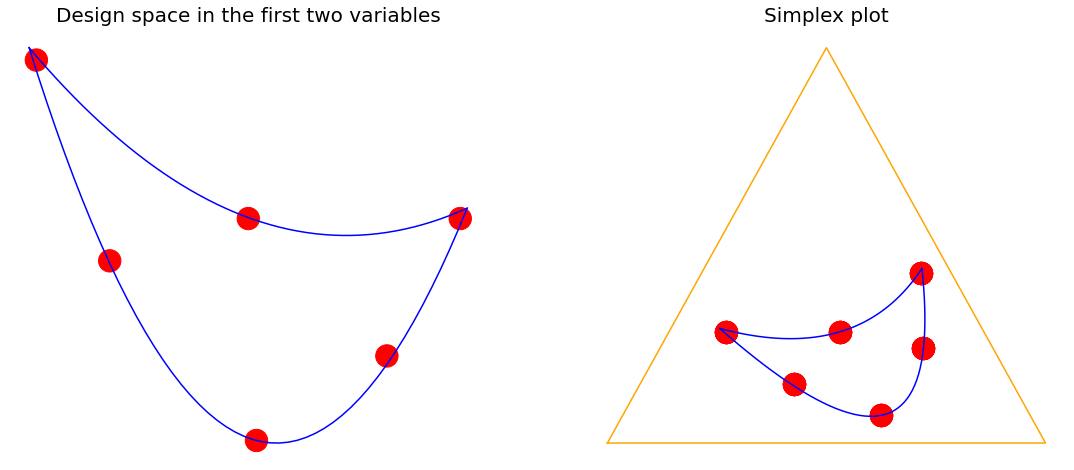

In [3]:
P_book = np.array([[0.59, 0.28], [0.50, 0.15],[0.34, 0.07], [0.33, 0.28], [0.16, 0.24], [0.07, 0.43]])
P_book = np.vstack((P_book,P_book,P_book,P_book,P_book))
print("Optimal log D-optimality criterion:", end=" ")
print(OD_3mix.opt(P_book, crit="D"))

#Constructing the simplex plot
fig = OD_3mix.plot(P_book,modify_plot=True)
fig.axes[0].change_geometry(1, 2, 1)
fig.axes[0].set_title("Design space in the first two variables", fontsize=20)
fig.add_subplot(1, 2, 2)
fig.set_size_inches(19, 8)

Q = np.copy(P_book)
Q[:,0] = 1-P_book[:, 0]-P_book[:, 1]/2
Q[:,1] *= np.sqrt(5)/2

fig.axes[1].plot(T1,A,'b')
fig.axes[1].plot(T2,B,'b')
fig.axes[1].plot([0, 0.5, 1, 0],[0, np.sqrt(5)/2, 0, 0], 'orange')
fig.axes[1].axis("off")
fig.axes[1].scatter(Q[:, 0], Q[:, 1], marker='o', c='r', s=500)
fig.axes[1].set_title("Simplex plot", fontsize=20)
fig

An optimal design can be found using De Castro's algorithm

Optimal log D-optimality criterion: 13.371426899360738


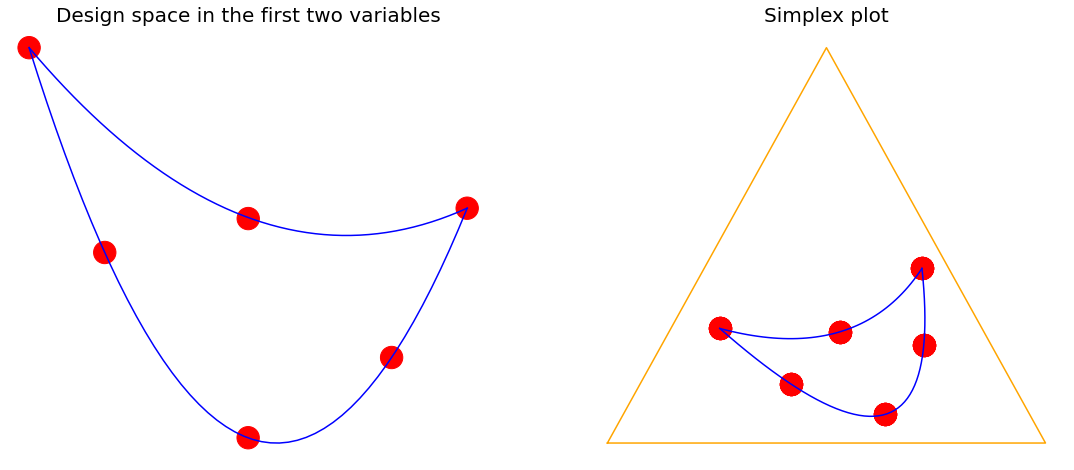

In [4]:
a = 2.888
b = -1.905
c = 0.1056
Delta = b**2-4*a*c
x0 = (-b-np.sqrt(Delta))/(2*a)
y0 = 1.174*x0**2-1.057*x0+0.5019

P_opt = np.array([[0.3298, 0.0726], [0.1539, 0.2479], [x0, y0], [0.5058, 0.14852], [0.3299, 0.28], [0.5985, 0.2898]])
P_opt = np.vstack((P_opt, P_opt, P_opt, P_opt, P_opt))
print("Optimal log D-optimality criterion:", end=" ")
print(OD_3mix.opt(P_opt, crit="D"))

#Constructing the simplex plot
fig = OD_3mix.plot(P_opt, modify_plot=True)
fig.axes[0].change_geometry(1, 2, 1)
fig.axes[0].set_title("Design space in the first two variables", fontsize=20)
fig.add_subplot(1, 2, 2)
fig.set_size_inches(19, 8)

Q = np.copy(P_opt)
Q[:, 0] = 1-P_opt[:, 0]-P_opt[:, 1]/2
Q[:, 1] *= np.sqrt(5)/2

fig.axes[1].plot(T1, A, 'b')
fig.axes[1].plot(T2, B, 'b')
fig.axes[1].plot([0, 0.5, 1, 0], [0, np.sqrt(5)/2, 0, 0], 'orange')
fig.axes[1].axis("off")
fig.axes[1].scatter(Q[:, 0], Q[:, 1], marker='o', c='r', s=500)
fig.axes[1].set_title("Simplex plot", fontsize=20)
fig

Now, testing all algorithms in this case gives:

log D-optimality criterion for one realization of DOGS after 200 iterations: 13.813044525328909
log D-optimality criterion for one realization of LSA after 2000 iterations: 15.579333169103446
log D-optimality criterion for one realization of ExM after 200 iterations: 18.385669418427295


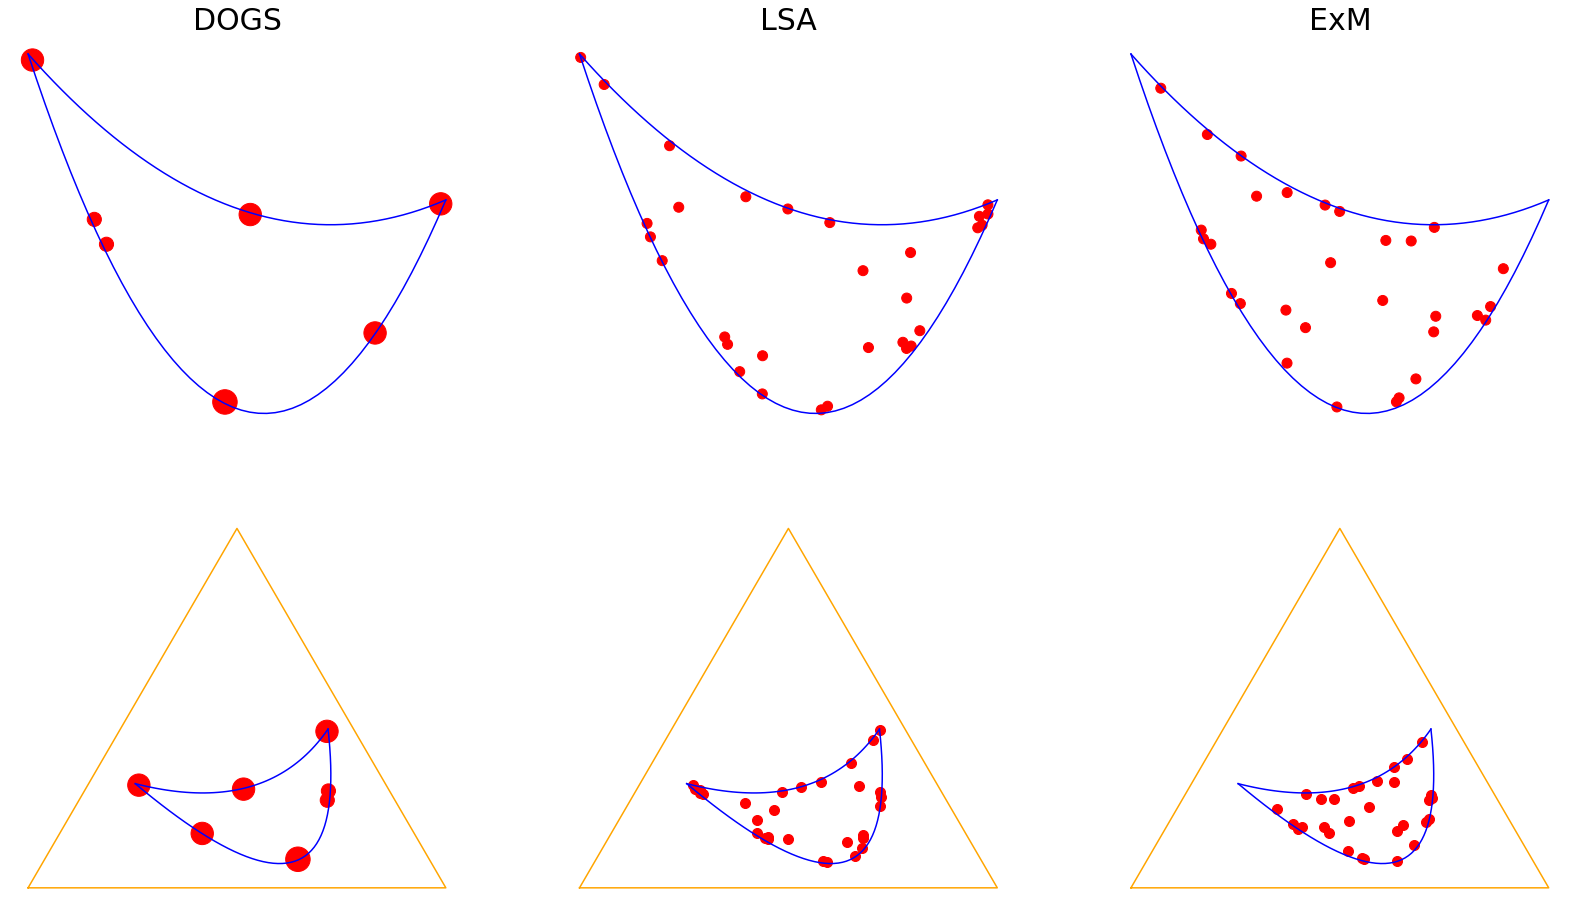

In [5]:
Algo_DOGS = DOGS(OD_3mix, 50)
P1 = Algo_DOGS.simulate(200)
print("log D-optimality criterion for one realization of DOGS after 200 iterations:", end=" ")
print(OD_3mix.opt(P1))

Algo_LSA = LSA(OD_3mix, 0.05)
P2 = Algo_LSA.simulate(2000)
print("log D-optimality criterion for one realization of LSA after 2000 iterations:", end=" ")
print(OD_3mix.opt(P2))

Algo_ExM = ExM(OD_3mix)
P3 = Algo_ExM.simulate(200)
print("log D-optimality criterion for one realization of ExM after 200 iterations:", end=" ")
print(OD_3mix.opt(P3))

#Constructing the simplex plot
fig = OD_3mix.plot((P1, P2, P3), modify_plot=True)
fig.axes[0].set_title("DOGS", fontsize=30)
fig.axes[1].set_title("LSA", fontsize=30)
fig.axes[2].set_title("ExM", fontsize=30)

fig.axes[0].change_geometry(2, 3, 1)
fig.axes[1].change_geometry(2, 3, 2)
fig.axes[2].change_geometry(2, 3, 3)
fig.add_subplot(2, 3, 4)
fig.add_subplot(2, 3, 5)
fig.add_subplot(2, 3, 6)
fig.set_size_inches(28, 16)

Q1 = np.copy(P1)
Q1[:, 0] = 1-P1[:, 0]-P1[:, 1]/2
Q1[:, 1] *= np.sqrt(5)/2

Q2 = np.copy(P2)
Q2[:, 0] = 1-P2[:, 0]-P2[:, 1]/2
Q2[:, 1] *= np.sqrt(5)/2

Q3 = np.copy(P3)
Q3[:, 0] = 1-P3[:, 0]-P3[:, 1]/2
Q3[:, 1] *= np.sqrt(5)/2

fig.axes[3].plot(T1, A, 'b')
fig.axes[3].plot(T2, B, 'b')
fig.axes[3].plot([0, 0.5, 1, 0], [0, np.sqrt(5)/2, 0, 0], 'orange')
fig.axes[3].axis("off")
Pt, Nb = np.unique([tuple(row) for row in Q1], axis=0, return_counts=True)
fig.axes[3].scatter(Pt[:, 0], Pt[:, 1], marker='o', c='r', s=100*Nb)

fig.axes[4].plot(T1, A, 'b')
fig.axes[4].plot(T2, B, 'b')
fig.axes[4].plot([0, 0.5, 1, 0], [0, np.sqrt(5)/2, 0, 0], 'orange')
fig.axes[4].axis("off")
fig.axes[4].scatter(Q2[:, 0], Q2[:, 1], marker='o', c='r', s=100)

fig.axes[5].plot(T1, A, 'b')
fig.axes[5].plot(T2, B, 'b')
fig.axes[5].plot([0, 0.5, 1, 0], [0, np.sqrt(5)/2, 0, 0], 'orange')
fig.axes[5].axis("off")
fig.axes[5].scatter(Q3[:, 0], Q3[:, 1], marker='o', c='r', s=100)
fig

DOGS often finds better designs than the one in the book. It's because the book used a discrete optimization algorithm on a thin grid which resulted on a small loss of precision.

### Comparing the performances of all algorithms

In [6]:
algo_tuple = (DOGS(OD_3mix, 50), LSA(OD_3mix, 0.01), ExM(OD_3mix))
depth = 200 #depth = 1000 was used in our paper
N_test = 40 #N_test = 200 was used in our paper
quantile = 0.05

List_time = []
List_all = []
List_median = []
List_quantile_low = []
List_quantile_high = []
for algo in algo_tuple:
    t = time.time()
    sim_res = algo.testing(depth, N_test, progress=True)
    List_time += [time.time()-t]
    List_all += [sim_res]
    List_median += [np.median(sim_res, axis=0)]
    List_quantile_low += [np.quantile(sim_res, quantile, axis=0)]
    List_quantile_high += [np.quantile(sim_res, 1-quantile, axis=0)]

Progress: 100.00% Done
Progress: 100.00% Done
Progress: 100.00% Done


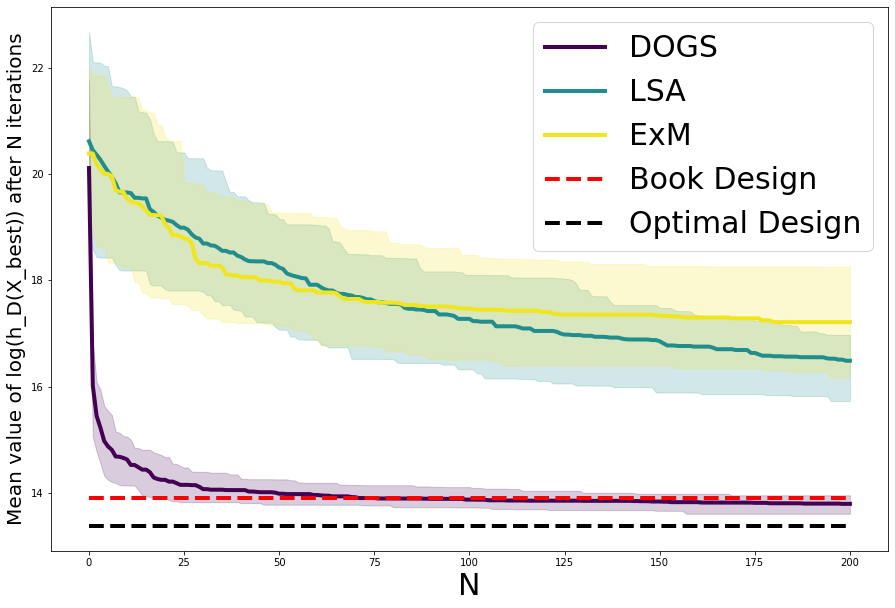

Average time for one realization of 200 iterations of DOGS: 5.631sec
Average time for one realization of 200 iterations of LSA: 0.092sec
Average time for one realization of 200 iterations of ExM: 3.060sec


In [7]:
#Plotting the results

plt.figure(figsize=(15, 10))
viridis = plt.cm.get_cmap('viridis')

for k in range(3):
    plt.plot(List_median[k], linewidth=4, color=viridis(k*0.49))
plt.plot([0, depth], [OD_3mix.opt(P_book), OD_3mix.opt(P_book)], 'r--', linewidth=4)
plt.plot([0, depth], [OD_3mix.opt(P_opt), OD_3mix.opt(P_opt)], '--', color="black", linewidth=4)
    
for k in range(3):
    Q_low = List_quantile_low[k]
    Q_high = List_quantile_high[k]
    plt.fill_between(np.arange(depth+1), Q_low, Q_high, color=viridis(k*0.49), alpha=.2)

plt.legend(labels=["DOGS", "LSA", "ExM", "Book Design", "Optimal Design"], fontsize=30)
plt.xlabel('N', fontsize=30)
plt.ylabel('Mean value of log(h_D(X_best)) after N iterations', fontsize=20)
plt.show()
print(f'Average time for one realization of {depth} iterations of DOGS: {List_time[0]/(N_test):.3f}sec')
print(f'Average time for one realization of {depth} iterations of LSA: {(List_time[1])/(N_test):.3f}sec')
print(f'Average time for one realization of {depth} iterations of ExM: {List_time[2]/(N_test):.3f}sec');

In [8]:
#Comparison when the regression functions are polynomials with degree <= 4.
PHI = PHImono(2, 4)
OD_3mix_deg4 = OptDesign(PHI, [0, 0], [1, 1], nbpoint=30, cara=SimplexCara, plot_fun=Simplexplot)

algo_tuple = (DOGS(OD_3mix_deg4, 50), LSA(OD_3mix_deg4, 0.01), ExM(OD_3mix_deg4))
depth = 200 #depth = 1000 was used in our paper
N_test = 40 #N_test = 200 was used in our paper
quantile = 0.05

List_time = []
List_all = []
List_median = []
List_quantile_low = []
List_quantile_high = []
for algo in algo_tuple:
    t = time.time()
    sim_res = algo.testing(depth, N_test, progress=True)
    List_time += [time.time()-t]
    List_all += [sim_res]
    List_median += [np.median(sim_res, axis=0)]
    List_quantile_low += [np.quantile(sim_res, quantile, axis=0)]
    List_quantile_high += [np.quantile(sim_res, 1-quantile, axis=0)]
    
Algo_100grid = Discrete_ExM(OD_3mix_deg4, size=100)
N_discrete_test = 5

Discrete_Result = []
Discrete_Time = []
for i in range(N_discrete_test):
    t_up = time.time()
    Pt = Algo_100grid.simulate()
    t_down = time.time()
    Discrete_Time += [t_down-t_up]
    Discrete_Result += [OD_3mix_deg4.opt(Pt)]
    print('\rProgress: '+f'{100*(i+1)/N_discrete_test:.2f}'+'%', end=" ")

Progress: 100.00% Done
Progress: 100.00% Done
Progress: 100.00% Done
Progress: 100.00% 

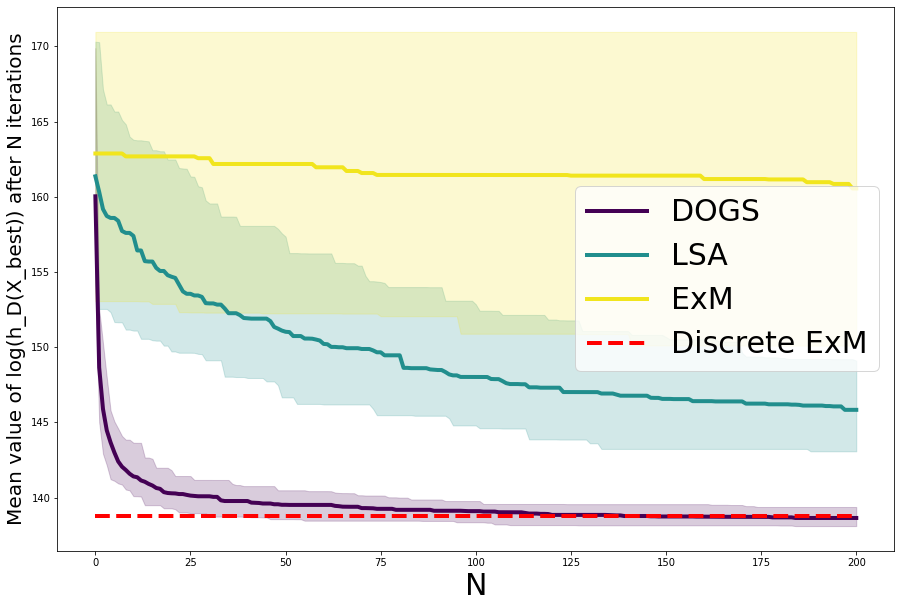

Average time for one realization of 200 iterations of DOGS: 10.176sec
Average time for one realization of 200 iterations of LSA: 0.142sec
Average time for one realization of 200 iterations of ExM: 1.732sec
Average time for one realization of Discrete ExM: 15.605sec


In [9]:
#Plotting the results

plt.figure(figsize=(15, 10))
viridis = plt.cm.get_cmap('viridis')

for k in range(3):
    plt.plot(List_median[k], linewidth=4, color=viridis(k*0.49))
m = np.median(Discrete_Result)
plt.plot([0, depth], [m, m], 'r--', linewidth=4)
    
for k in range(3):
    Q_low = List_quantile_low[k]
    Q_high = List_quantile_high[k]
    plt.fill_between(np.arange(depth+1), Q_low, Q_high, color=viridis(k*0.49), alpha=.2)

plt.legend(labels=["DOGS", "LSA", "ExM", "Discrete ExM"], fontsize=30)
plt.xlabel('N', fontsize=30)
plt.ylabel('Mean value of log(h_D(X_best)) after N iterations', fontsize=20)
plt.show()
print(f'Average time for one realization of {depth} iterations of DOGS: {List_time[0]/(N_test):.3f}sec')
print(f'Average time for one realization of {depth} iterations of LSA: {(List_time[1])/(N_test):.3f}sec')
print(f'Average time for one realization of {depth} iterations of ExM: {List_time[2]/(N_test):.3f}sec');
print(f'Average time for one realization of Discrete ExM: {np.mean(Discrete_Time):.3f}sec');

# 2. Multifactor B-Spline Mixed Models

This example is inspired by the paper "Multifactor B-spline mixed models in designed experiments for the engine mapping problem" from Grove et al.

In [10]:
#Defintion of the B-Spline functions
knots = [0, 0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1, 1]

f1 = BSpline(knots, [1, 0, 0, 0, 0, 0, 0], 3)
f2 = BSpline(knots, [0, 1, 0, 0, 0, 0, 0], 3)
f3 = BSpline(knots, [0, 0, 1, 0, 0, 0, 0], 3)
f4 = BSpline(knots, [0, 0, 0, 1, 0, 0, 0], 3)
f5 = BSpline(knots, [0, 0, 0, 0, 1, 0, 0], 3)
f6 = BSpline(knots, [0, 0, 0, 0, 0, 1, 0], 3)
f7 = BSpline(knots, [0, 0, 0, 0, 0, 0, 1], 3)

#Regression functions used in the paper of Grove et al.
def PHI(P):
    return np.vstack((0*P[:, 0]+1, f2(P[:, 0]), f3(P[:, 0]), f4(P[:, 0]), f5(P[:, 0]), f6(P[:, 0]), f7(P[:, 0]), \
        P[:, 1], P[:, 1]**2, P[:, 1]**3, P[:, 2], P[:, 2]**2, P[:, 2]**3, \
            P[:, 1]*f2(P[:, 0]), P[:, 1]*f3(P[:, 0]), P[:, 1]*f4(P[:, 0]), P[:, 1]*f5(P[:, 0]), P[:, 1]*f6(P[:, 0]), P[:, 1]*f7(P[:, 0]), \
                P[:, 2]*f2(P[:, 0]), P[:, 2]*f3(P[:, 0]), P[:, 2]*f4(P[:, 0]), P[:, 2]*f5(P[:, 0]), P[:, 2]*f6(P[:, 0]), P[:, 2]*f7(P[:, 0]), \
                    P[:, 1]*P[:, 2], P[:, 0]*P[:, 1]**2, P[:, 0]*P[:, 2]**2, P[:, 1]*P[:, 2]**2, P[:, 2]*P[:, 1]**2, P[:, 0]*P[:, 1]*P[:, 2])).T

#The first design space we consider is a simple cube.
OD_BSpline_Cube = OptDesign(PHI, [0, 0, 0], [1, 1, 1], nbpoint=55)

def Ball_Cara(P):
    c1 = (3-np.sqrt(3))/4
    c2 = 1-(3-np.sqrt(3))/4
    R = (3-np.sqrt(3))/4
    Bool_Ar1=((P[:, 0]-c1)**2+(P[:, 1]-c1)**2+(P[:, 2]-c1)**2) <= R**2
    Bool_Ar2=((P[:, 0]-c2)**2+(P[:, 1]-c2)**2+(P[:, 2]-c2)**2) <= R**2
    return(np.logical_or(Bool_Ar1, Bool_Ar2))

#The second design space we consider is the union of two balls.
OD_BSpline_2Balls = OptDesign(PHI, [0, 0, 0], [1, 1, 1], cara=Ball_Cara, nbpoint=55)

#Two examples of random design in each case
Pt1 = OD_BSpline_Cube.Urand(OD_BSpline_Cube.nbpoint)
print("log D-optimality criterion of a random design chosen with a uniform distribution on the cube:", end = " ")
print(OD_BSpline_Cube.opt(Pt1, crit="D"))

Pt2 = OD_BSpline_2Balls.Urand(OD_BSpline_2Balls.nbpoint)
print("log D-optimality criterion of a random design chosen with a uniform distribution on the 2 balls:", end = " ")
print(OD_BSpline_2Balls.opt(Pt2, crit="D"))

log D-optimality criterion of a random design chosen with a uniform distribution on the cube: 56.12591635734605
log D-optimality criterion of a random design chosen with a uniform distribution on the 2 balls: 131.83503387711713


Based on the recommandations in the paper "Designing experiments for multi-variable B-spline models" by Woods et al., we consider the following two sets of candidate points.

28 points in CP
700 points in CP2


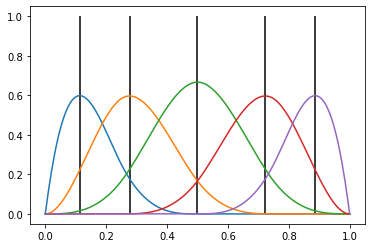

In [11]:
from scipy.optimize import minimize, Bounds

#Defining the maximum of the B-splines.
x1 = minimize(lambda x:-f2(x), np.array([0.2]), bounds=Bounds(tuple([0]), tuple([1]))).x
x2 = minimize(lambda x:-f3(x), np.array([0.5]), bounds=Bounds(tuple([0]), tuple([1]))).x
x3 = minimize(lambda x:-f4(x), np.array([0.5]), bounds=Bounds(tuple([0]), tuple([1]))).x
x4 = minimize(lambda x:-f5(x), np.array([0.5]), bounds=Bounds(tuple([0]), tuple([1]))).x
x5 = minimize(lambda x:-f6(x), np.array([0.8]), bounds=Bounds(tuple([0]), tuple([1]))).x

#Checking with a plot that the maxima are correct.
x = np.linspace(0, 1, 200)
plt.plot(x, f2(x))
plt.vlines(x1, 0, 1)
plt.plot(x, f3(x))
plt.vlines(x2, 0, 1)
plt.plot(x, f4(x))
plt.vlines(x3, 0, 1)
plt.plot(x, f5(x))
plt.vlines(x4, 0, 1)
plt.plot(x, f6(x))
plt.vlines(x5, 0, 1)

from ODfunctions import RegP #Function generating regular grids

#First set of candidate points for DOGS
P = RegP([0, 0], [1, 1], 2)
P1 = np.hstack((np.array([[0 for _ in range(4)]]).T, P))
P2 = np.hstack((np.array([x1 for _ in range(4)]), P))
P3 = np.hstack((np.array([x2 for _ in range(4)]), P))
P4 = np.hstack((np.array([x3 for _ in range(4)]), P))
P5 = np.hstack((np.array([x4 for _ in range(4)]), P))
P6 = np.hstack((np.array([x5 for _ in range(4)]), P))
P7 = np.hstack((np.array([[1 for _ in range(4)]]).T, P))
CP = np.vstack((P1, P2, P3, P4, P5, P6, P7))
print(str(CP.shape[0])+" points in CP")

#Second set of candidate points for Discrete ExM
P = RegP([0, 0], [1, 1], 10)
P1 = np.hstack((np.array([[0 for _ in range(100)]]).T, P))
P2 = np.hstack((np.array([x1 for _ in range(100)]), P))
P3 = np.hstack((np.array([x2 for _ in range(100)]), P))
P4 = np.hstack((np.array([x3 for _ in range(100)]), P))
P5 = np.hstack((np.array([x4 for _ in range(100)]), P))
P6 = np.hstack((np.array([x5 for _ in range(100)]), P))
P7 = np.hstack((np.array([[1 for _ in range(100)]]).T, P))
CP2 = np.vstack((P1, P2, P3, P4, P5, P6, P7))
print(str(CP2.shape[0])+" points in CP2")

We can check that CP improves significantly DOGS.

In [12]:
DOGS_woCP = DOGS(OD_BSpline_Cube, 50)
DOGS_withCP = DOGS(OD_BSpline_Cube, 22, CP=CP)

Pt1 = DOGS_woCP.simulate(100)
print("log D-optimality criterion of a desgin obtained after 100 iterations of DOGS without CP:", end=" ")
print(OD_BSpline_Cube.opt(Pt1))

Pt2 = DOGS_withCP.simulate(100)
print("log D-optimality criterion of a desgin obtained after 100 iterations of DOGS with CP:", end=" ")
print(OD_BSpline_Cube.opt(Pt2))

log D-optimality criterion of a desgin obtained after 100 iterations of DOGS without CP: 35.53525509295213
log D-optimality criterion of a desgin obtained after 100 iterations of DOGS with CP: 25.688966461564647


Similarly, we can also check that CP2 is a better choice for Discrete ExM than a regular grid.

In [13]:
D_ExM_CP = Discrete_ExM(OD_BSpline_Cube, size=0, CP=CP2)
D_ExM_grid = Discrete_ExM(OD_BSpline_Cube, size=10)

print("D_ExM_grid uses "+str(D_ExM_grid.num_point())+" candidate points.")
print("D_ExM_CP uses "+str(D_ExM_CP.num_point())+" candidate points.")

Pt1 = D_ExM_grid.simulate()
print("log D-optimality criterion of a desgin obtained with D_ExM_grid:", end=" ")
print(OD_BSpline_Cube.opt(Pt1))

Pt2 = D_ExM_CP.simulate()
print("log D-optimality criterion of a desgin obtained with D_ExM_CP:", end=" ")
print(OD_BSpline_Cube.opt(Pt2))

D_ExM_grid uses 1000 candidate points.
D_ExM_CP uses 700 candidate points.
log D-optimality criterion of a desgin obtained with D_ExM_grid: 19.334663164909685
log D-optimality criterion of a desgin obtained with D_ExM_CP: 17.91029907716707


Testing and plotting the performances of each algorithms depending on their number of iterations for the cubic design space.

In [14]:
algo_tuple = (DOGS(OD_BSpline_Cube, 50), DOGS(OD_BSpline_Cube, 22, CP=CP), LSA(OD_BSpline_Cube, 0.01), ExM(OD_BSpline_Cube))
depth = 200 #depth = 1000 was used in our paper
N_test = 40 #N_test = 200 was used in our paper
quantile = 0.05

List_time = []
List_all = []
List_median = []
List_quantile_low = []
List_quantile_high = []
for algo in algo_tuple:
    t = time.time()
    sim_res = algo.testing(depth, N_test, progress=True)
    List_time += [time.time()-t]
    List_all += [sim_res]
    List_median += [np.median(sim_res, axis=0)]
    List_quantile_low += [np.quantile(sim_res, quantile, axis=0)]
    List_quantile_high += [np.quantile(sim_res, 1-quantile, axis=0)]
    
Algo_nogrid_withCP = Discrete_ExM(OD_BSpline_Cube, CP=CP2)  
N_discrete_test = 5

Discrete_Result = []
Discrete_Time = []
for i in range(N_discrete_test):
    t_up = time.time()
    Pt = Algo_nogrid_withCP.simulate()
    t_down = time.time()
    Discrete_Time += [t_down-t_up]
    Discrete_Result += [OD_BSpline_Cube.opt(Pt)]
    print('\rProgress: '+f'{100*(i+1)/N_discrete_test:.2f}'+'%', end=" ")

Progress: 100.00% Done
Progress: 100.00% Done
Progress: 100.00% Done
Progress: 100.00% Done
Progress: 100.00% 

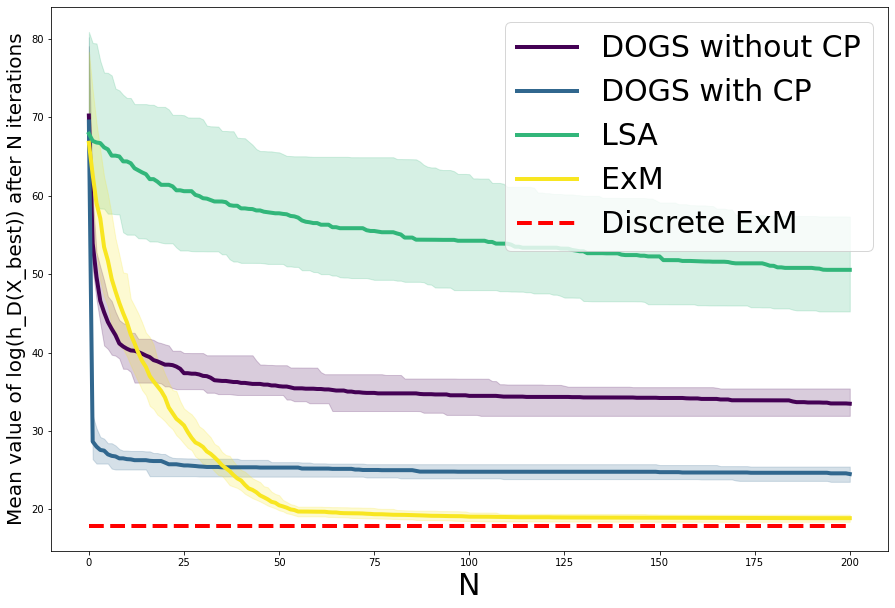

Average time for one realization of 200 iterations of DOGS: 27.583sec
Average time for one realization of 200 iterations of LSA: 22.681sec
Average time for one realization of 200 iterations of ExM: 0.876sec
Average time for one realization of Discrete ExM: 257.992sec


In [15]:
#Plotting the results

plt.figure(figsize = (15, 10))
viridis = plt.cm.get_cmap('viridis')

for k in range(4):
    plt.plot(List_median[k], linewidth=4, color=viridis(k*0.33))
m = np.median(Discrete_Result)
plt.plot([0, depth], [m, m], 'r--', linewidth=4)
    
for k in range(4):
    Q_low = List_quantile_low[k]
    Q_high = List_quantile_high[k]
    plt.fill_between(np.arange(depth+1), Q_low, Q_high, color=viridis(k*0.33), alpha=.2)

plt.legend(labels=["DOGS without CP", "DOGS with CP", "LSA", "ExM", "Discrete ExM"], fontsize=30)
plt.xlabel('N', fontsize=30)
plt.ylabel('Mean value of log(h_D(X_best)) after N iterations', fontsize=20)
plt.show()
print(f'Average time for one realization of {depth} iterations of DOGS: {List_time[0]/(N_test):.3f}sec')
print(f'Average time for one realization of {depth} iterations of LSA: {(List_time[1])/(N_test):.3f}sec')
print(f'Average time for one realization of {depth} iterations of ExM: {List_time[2]/(N_test):.3f}sec');
print(f'Average time for one realization of Discrete ExM: {np.mean(Discrete_Time):.3f}sec');

Testing and plotting the performances of each algorithms depending on their number of iterations for the union of two balls design space.

In [16]:
algo_tuple = (DOGS(OD_BSpline_2Balls, 50), LSA(OD_BSpline_2Balls, 0.01), ExM(OD_BSpline_2Balls))
depth = 200 #depth = 1000 was used in our paper
N_test = 40 #N_test = 200 was used in our paper
quantile = 0.05

List_time = []
List_all = []
List_median = []
List_quantile_low = []
List_quantile_high = []
for algo in algo_tuple:
    t = time.time()
    sim_res = algo.testing(depth, N_test, progress=True)
    List_time += [time.time()-t]
    List_all += [sim_res]
    List_median += [np.median(sim_res, axis=0)]
    List_quantile_low += [np.quantile(sim_res, quantile, axis=0)]
    List_quantile_high += [np.quantile(sim_res, 1-quantile, axis=0)]
    
Algo_15grid = Discrete_ExM(OD_BSpline_Cube, size=15)
N_discrete_test = 5

Discrete_Result = []
Discrete_Time = []
for i in range(N_discrete_test):
    t_up = time.time()
    Pt = Algo_nogrid_withCP.simulate()
    t_down = time.time()
    Discrete_Time += [t_down-t_up]
    Discrete_Result += [OD_BSpline_Cube.opt(Pt)]
    print('\rProgress: '+f'{100*(i+1)/N_discrete_test:.2f}'+'%', end=" ")

Progress: 100.00% Done
Progress: 100.00% Done
Progress: 100.00% Done
Progress: 100.00% 

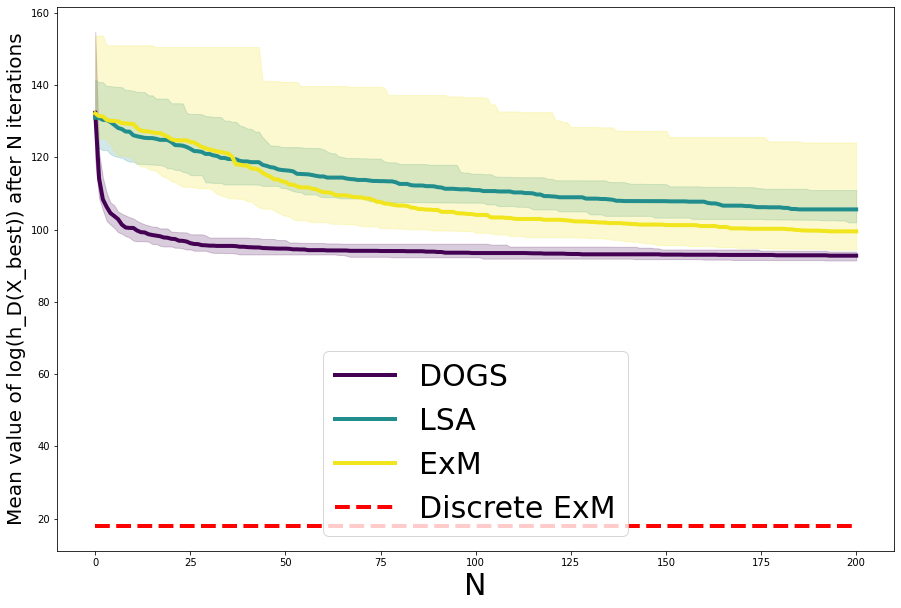

Average time for one realization of 200 iterations of DOGS: 26.777sec
Average time for one realization of 200 iterations of LSA: 0.884sec
Average time for one realization of 200 iterations of ExM: 19.574sec
Average time for one realization of Discrete ExM: 269.909sec


In [17]:
#Plotting the results

plt.figure(figsize=(15, 10))
viridis = plt.cm.get_cmap('viridis')

for k in range(3):
    plt.plot(List_median[k], linewidth=4, color=viridis(k*0.49))
m = np.median(Discrete_Result)
plt.plot([0, depth], [m, m], 'r--', linewidth=4)
    
for k in range(3):
    Q_low = List_quantile_low[k]
    Q_high = List_quantile_high[k]
    plt.fill_between(np.arange(depth+1), Q_low, Q_high, color = viridis(k*0.49), alpha=.2)

plt.legend(labels=["DOGS", "LSA", "ExM", "Discrete ExM"], fontsize=30)
plt.xlabel('N', fontsize=30)
plt.ylabel('Mean value of log(h_D(X_best)) after N iterations', fontsize=20)
plt.show()
print(f'Average time for one realization of {depth} iterations of DOGS: {List_time[0]/(N_test):.3f}sec')
print(f'Average time for one realization of {depth} iterations of LSA: {(List_time[1])/(N_test):.3f}sec')
print(f'Average time for one realization of {depth} iterations of ExM: {List_time[2]/(N_test):.3f}sec');
print(f'Average time for one realization of Discrete ExM: {np.mean(Discrete_Time):.3f}sec');

# 3. Nepheline crystallization in high-level nuclear waste glass

This example is inspired by the paper "Developing a space-filling mixture experiment design when the components are subject to linear and nonlinear constraints." from Pieper et al.

In [18]:
lp = [0.215, 0.14, 0, 0.02, 0, 0.07, 0.225]
up = [0.32, 0.24, 0.05, 0.05, 0.06, 0.16, 0.335]

PHI = PHImono(7, 2)

def NCCara(P):
    Bool_Ar = np.logical_and(np.sum(P, axis=1) <= 0.97, np.sum(P, axis = 1) >= 0.88)
    Lin_cstr = 11.670065*P[:, 0]-7.446645*P[:, 1]-7.605447*P[:, 2]-0.110824*P[:, 3]-32.673443*P[:, 4]-9.308093*P[:, 5]+8.880917*P[:, 6]+3.768904*(1-np.sum(P, axis=1))
    Bool_Ar = np.logical_and(Bool_Ar, Lin_cstr <= np.log(10))
    Bool_Ar = np.logical_and(Bool_Ar, Lin_cstr >= np.log(4))
    D = P[:, 5]+0.878*P[:, 4]+0.3*P[:, 2]+P[:, 0]+P[:, 6]+1.733*P[:, 1]
    g_SiB = (P[:, 6]+1.733*P[:, 1])/D
    g_AlFe = P[:, 0]/D
    g_Alk = (P[:, 5]+0.878*P[:, 4]+0.3*P[:, 2])/D
    LP = -28.874*g_Alk-55.441*g_AlFe-10.173*g_SiB+605.927*g_Alk*g_AlFe
    Non_Lin_cstr = np.exp(LP)/(1+np.exp(LP))
    Bool_Ar = np.logical_and(Bool_Ar, Non_Lin_cstr <= 0.65)
    Bool_Ar = np.logical_and(Bool_Ar, Non_Lin_cstr >= 0.20)
    for i in range(7):
        Bool_Ar = np.logical_and(Bool_Ar, P[:, i] <= up[i])
        Bool_Ar = np.logical_and(Bool_Ar, P[:, i] >= lp[i])
    return(Bool_Ar)

OD_Nepheline = OptDesign(PHI, lp, up, cara=NCCara)
P = OD_Nepheline.Urand(OD_Nepheline.nbpoint)
print("log D-optimality criterion of a random design chosen with a uniform distribution:", end=" ")
print(OD_Nepheline.opt(P))
print("log A-optimality criterion of the same design:", end=" ")
print(np.log(OD_Nepheline.opt(P, crit="A")))

log D-optimality criterion of a random design chosen with a uniform distribution: 473.42820219573196
log A-optimality criterion of the same design: 30.548974711502225


We identified 24 candidate points as intersection between some of the linear and non-linear constraints defining the design space.

In [19]:
lp = [0.215, 0.14, 0, 0.02, 0, 0.07, 0.225]
up = [0.32, 0.24, 0.05, 0.05, 0.06, 0.16, 0.335]

def f_fun(P):
    return np.sum(P, axis = 1)
# 0.88 <= f_fun <= 0.97

def g_fun(P):
    return 11.670065*P[:, 0]-7.446645*P[:, 1]-7.605447*P[:, 2]-0.110824*P[:, 3]-32.673443*P[:, 4]-9.308093*P[:, 5]+8.880917*P[:, 6]+3.768904*(1-np.sum(P, axis=1))
# np.log(4) <= g_fun <= np.log(10)

def h_fun(P):
    D = P[:, 5]+0.878*P[:, 4]+0.3*P[:, 2]+P[:, 0]+P[:, 6]+1.733*P[:, 1]
    g_SiB = (P[:, 6]+1.733*P[:, 1])/D
    g_AlFe = P[:, 0]/D
    g_Alk = (P[:, 5]+0.878*P[:, 4]+0.3*P[:, 2])/D
    LP = -28.874*g_Alk-55.441*g_AlFe-10.173*g_SiB+605.927*g_Alk*g_AlFe
    return np.exp(LP)/(1+np.exp(LP))
# 0.20 <= h_fun <= 0.65

L = [-1, 1, -1, -1, 1, 1, 0]
def testedge(L):
    n = 1000
    P = np.array([[0., 0, 0, 0, 0, 0, 0]])
    for i in range(7):
        if L[i] == -1:
            P[:, i] = lp[i]
        elif L[i] == 1:
            P[:, i] = up[i]
        else:
            P = P*np.ones((n, 1))
            X = np.linspace(lp[i], up[i], n)
            P[:, i] = X
            
    Yf = f_fun(P)
    Yg = g_fun(P)
    Yh = h_fun(P)
 
    B1 = np.logical_and(Yf <= 0.97 , Yf >= 0.88)
    B2 = np.logical_and(Yg <= np.log(10) , Yg >= np.log(4))
    B3 = np.logical_and(Yh <= 0.65 , Yh >= 0.20)
    
    Bcomb = np.logical_and(B1, B2)
    Bcomb = np.logical_and(Bcomb, B3)
    return X[Bcomb]

def getpoint(L, res):
    P=np.array([[0., 0, 0, 0, 0, 0, 0]])
    for i in range(7):
        if L[i] == -1:
            P[:, i] = lp[i]
        elif L[i] == 1:
            P[:, i] = up[i]
        else:
            P = P*np.ones((2, 1))
            P[:, i] = np.array([np.min(res), np.max(res)])
    return P

from ODfunctions import RegP #Function generating regular grids
Lall = RegP([-1, -1, -1, -1, -1, -1], [1, 1, 1, 1, 1, 1], 2)
Lall = np.hstack((Lall, np.array([[0 for _ in range(64)]]).T))
CP = np.array([])
CP.shape = (0, 7)
for row in Lall:
    res = testedge(row)
    if len(res)>0:
        CP = np.vstack((CP, getpoint(row, res)))
        print(row, np.min(res), np.max(res))

Lall = Lall[:, [0, 1, 2, 3, 4, 6, 5]]
for row in Lall:
    res=testedge(row)
    if len(res)>0:
        CP=np.vstack((CP, getpoint(row, res)))
        print(row, np.min(res), np.max(res))
        
Lall = Lall[:, [0, 1, 2, 3, 5, 4, 6]]
for row in Lall:
    res = testedge(row)
    if len(res)>0:
        CP = np.vstack((CP, getpoint(row, res)))
        print(row, np.min(res), np.max(res))
        
Lall = Lall[:, [0, 1, 2, 4, 3, 5, 6]]
for row in Lall:
    res = testedge(row)
    if len(res)>0:
        CP=np.vstack((CP, getpoint(row, res)))
        print(row, np.min(res), np.max(res))
        
Lall = Lall[:, [0, 1, 3, 2, 4, 5, 6]]
for row in Lall:
    res = testedge(row)
    if len(res)>0:
        CP = np.vstack((CP, getpoint(row, res)))
        print(row, np.min(res), np.max(res))
        
Lall = Lall[:, [0, 2, 1, 3, 4, 5, 6]]
for row in Lall:
    res = testedge(row)
    if len(res)>0:
        CP = np.vstack((CP, getpoint(row, res)))
        print(row, np.min(res), np.max(res))
        
Lall = Lall[:, [1, 0, 2, 3, 4, 5, 6]]
for row in Lall:
    res = testedge(row)
    if len(res)>0:
        CP = np.vstack((CP, getpoint(row, res)))
        print(row, np.min(res), np.max(res))

[-1. -1.  1.  1.  1. -1.  0.] 0.29503003003003003 0.2954704704704705
[ 1. -1.  1.  1.  1. -1.  0.] 0.2695945945945946 0.27994494494494493
[-1. -1. -1. -1.  1.  0.  1.] 0.11000000000000001 0.12090090090090092
[-1. -1. -1.  1.  1.  0.  1.] 0.09837837837837839 0.12090090090090092
[-1. -1.  1. -1.  1.  0.  1.] 0.08333333333333334 0.10585585585585586
[-1. -1.  1.  1.  1.  0.  1.] 0.08333333333333334 0.09738738738738739
[-1.  0.  1. -1. -1.  1. -1.] 0.21007007007007006 0.22218218218218216
[-1.  0.  1.  1. -1.  1. -1.] 0.20536536536536537 0.21187187187187187
[ 1.  0.  1. -1.  1. -1. -1.] 0.16572572572572575 0.19705705705705706
[ 1.  0.  1.  1.  1. -1. -1.] 0.16572572572572575 0.19495495495495496
[ 0.  1. -1.  1. -1.  1. -1.] 0.28426426426426427 0.294984984984985
[ 0.  1.  1. -1. -1.  1. -1.] 0.24022522522522521 0.27490990990990993


We can check that CP improves significantly DOGS.

In [20]:
DOGS_woCP = DOGS(OD_Nepheline, 100)
DOGS_withCP = DOGS(OD_Nepheline, 76, CP=CP)

Pt1 = DOGS_woCP.simulate(100)
print("log D-optimality criterion of a desgin obtained after 100 iterations of DOGS without CP:", end=" ")
print(OD_Nepheline.opt(Pt1))

Pt2 = DOGS_withCP.simulate(100)
print("log D-optimality criterion of a desgin obtained after 100 iterations of DOGS with CP:", end=" ")
print(OD_Nepheline.opt(Pt2))

log D-optimality criterion of a desgin obtained after 100 iterations of DOGS without CP: 414.66790024596975
log D-optimality criterion of a desgin obtained after 100 iterations of DOGS with CP: 408.1352030799419


In [21]:
algo_tuple = (DOGS(OD_Nepheline, 100), DOGS(OD_Nepheline, 76, CP=CP), LSA(OD_Nepheline, 0.001), ExM(OD_Nepheline))
depth = 200 #depth = 1000 was used in our paper
N_test = 40 #N_test = 200 was used in our paper
quantile = 0.05

List_time = []
List_all = []
List_median = []
List_quantile_low = []
List_quantile_high = []
for algo in algo_tuple:
    t = time.time()
    sim_res = algo.testing(depth, N_test, progress=True)
    List_time += [time.time()-t]
    List_all += [sim_res]
    List_median += [np.median(sim_res, axis=0)]
    List_quantile_low += [np.quantile(sim_res, quantile, axis=0)]
    List_quantile_high += [np.quantile(sim_res, 1-quantile, axis=0)]
    
Algo_4grid = Discrete_ExM(OD_Nepheline, size = 4, CP = CP)
N_discrete_test = 5

Discrete_Result = []
Discrete_Time = []
for i in range(N_discrete_test):
    t_up = time.time()
    Pt = Algo_4grid.simulate()
    t_down = time.time()
    Discrete_Time += [t_down-t_up]
    Discrete_Result += [OD_Nepheline.opt(Pt)]
    print('\rProgress: '+f'{100*(i+1)/N_discrete_test:.2f}'+'%', end = " ")

Progress: 100.00% Done
Progress: 100.00% Done
Progress: 100.00% Done
Progress: 100.00% Done
Progress: 100.00% 

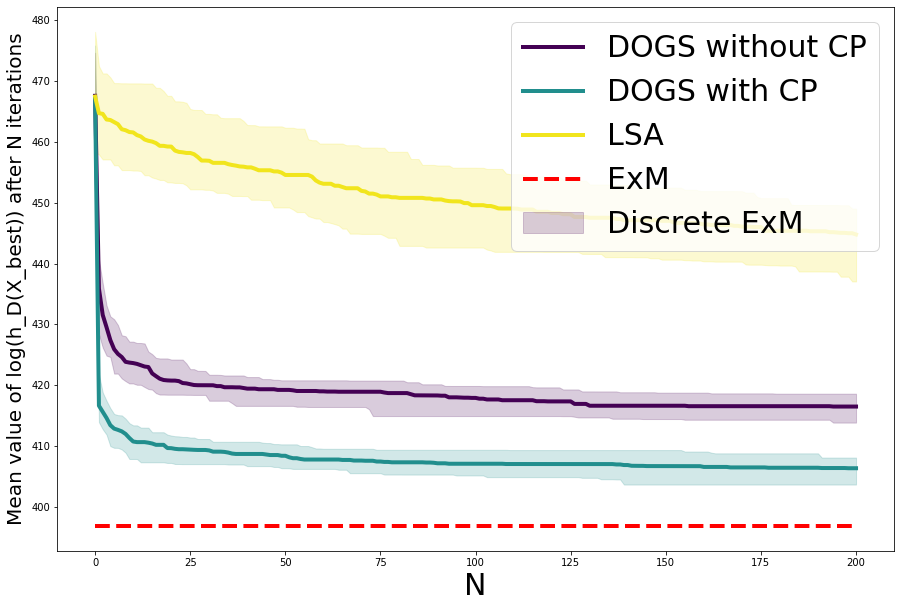

Average time for one realization of 200 iterations of DOGS: 36.774sec
Average time for one realization of 200 iterations of LSA: 34.593sec
Average time for one realization of 200 iterations of ExM: 1.802sec
Average time for one realization of Discrete ExM: 163.989sec


In [22]:
#Plotting the results

plt.figure(figsize = (15, 10))
viridis = plt.cm.get_cmap('viridis')

for k in range(3):
    plt.plot(List_median[k], linewidth = 4, color = viridis(k*0.49))
m = np.median(Discrete_Result)
plt.plot([0, depth], [m, m], 'r--', linewidth = 4)
    
for k in range(3):
    Q_low = List_quantile_low[k]
    Q_high = List_quantile_high[k]
    plt.fill_between(np.arange(depth+1), Q_low, Q_high, color = viridis(k*0.49), alpha = .2)

plt.legend(labels = ["DOGS without CP", "DOGS with CP", "LSA", "ExM", "Discrete ExM"], fontsize = 30)
plt.xlabel('N', fontsize = 30)
plt.ylabel('Mean value of log(h_D(X_best)) after N iterations', fontsize = 20)
plt.show()
print(f'Average time for one realization of {depth} iterations of DOGS: {List_time[0]/(N_test):.3f}sec')
print(f'Average time for one realization of {depth} iterations of LSA: {(List_time[1])/(N_test):.3f}sec')
print(f'Average time for one realization of {depth} iterations of ExM: {List_time[2]/(N_test):.3f}sec');
print(f'Average time for one realization of Discrete ExM: {np.mean(Discrete_Time):.3f}sec');